# 0. 라이브러리 및 기본 설정

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트설정
plt.rc("font", family="AppleGothic")

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_29274/1385599686.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


# 1. 데이터셋 살펴보기

In [4]:

"""
https://www.kaggle.com/jessemostipak/hotel-booking-demand
Hotel                    : H1 = Resort Hotel or H2 = City Hotel
is_canceled              : 예약 취소 여부
lead_time                : 예약을 입력한 시간과 실제로 도착한 시간까지의 시간 차이(단위: 시간)
arrival_date_year        : 도착한 연도
arrival_date_month       : 도착한 월
arrival_date_week_number : 도착한 주(연 기준)
arrival_date_day_of_month: 도착한 일(월 기준)
stays_in_weekend_nights  : 손님이 호텔을 예약하거나 묵은 주말밤 수(일 단위)
stays_in_week_nights     : 손님이 호텔을 예약하거나 묵은 주중밤 수(일 단위)
meal                     : SC: 식사 패키지가 아님, BB: Bed & Breakfast, HB: Half board (아침식사와 하나의 다른 식사(보통 저녁), FB: 아침,점심,저녁 패키지
country                  : ISO 3155–3:2013 형식의 지역 id
market_segment           : 고객의 접근 매체 및 방식 “TA”: “Travel Agents”, “TO”: “Tour Operators”
distribution_channel     : 고객의 예약 채널
is_repeated_guest        : 두 번째 예약인가 1: yes, 2: no
previous_cancellations   : 예약을 미리 취소한 수
reserved_room_type       : 예약 방 타입
assigned_room_type       : 고객이나 호텔과 같은 기타 사유로 인해 예약과 다른 방을 배정을 해주었을 때 그 방 타입
booking_changes          : 예약 이후 체크인이나 취소하기 까지 예약 변경 횟수
deposit_type             : 예치금 타입
agent                    : 직접 예약을 해준 여행 회사 ID
company                  : 예약에 기여를 한 회사 ID
days_in_waiting_list     : 예약을 하고 예약이 완료되기 까지의 시간
customer_type            : 고객의 타입
adr                      : (Average Daily Rate) transactions by the 묵은 밤 수 전체
required_car_parking_spaces : 필요한 주차 공간 수
total_of_special_requests   : 고객의 특별 주문 횟수(트윈 침대, 높은 층 등..)
reservation_status          : 최종 예약 상태
reservation_status_date     : 최종 예약 상태 확정 날짜


여름 성수기에 대한 대책
    a. 운영방식
    b. 매출 증대 및 가지 치기
    c. 인기 식사 종류 파악
    d. 주요 고객층 파악
    


1. City Hotel
2. 성수기 = (7월 8월)
    1. 성수기 각 월마다 일별 실제 방문 고객의 수
    2. 취소율


1. 휴가자는 월요일, 비휴가자는 토요일이란 주장을 보충하고자
성수기를 제외한 달의 요일별 고객수를 파악하여
월요일이 높은지 확인.
    만약 월요일이 높지 않다면, 주장 근거 O
    만약 월요일이 높다면, 주장 근거 X

2. 각 요일별 연박 비율

"""

df = pd.read_csv('data/hotel_bookings.csv')
city_df = df[df['hotel'] == 'City Hotel']
city_df.head()

# 1. 성수기 각 월마다 일별 실제 방문 고객의 수
peak_month = ["July", "August"]
peak_df    = city_df[city_df["arrival_date_month"].isin(peak_month)]
peak_df    = peak_df[peak_df["is_canceled"] == 0]
peak_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,NaN,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## a. 결측치 확인

In [6]:
peak_df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              901
company                           9794
days_in_waiting_list     

## b. 데이터셋 개요 확인

In [8]:
peak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10163 entries, 40060 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           10163 non-null  object 
 1   is_canceled                     10163 non-null  int64  
 2   lead_time                       10163 non-null  int64  
 3   arrival_date_year               10163 non-null  int64  
 4   arrival_date_month              10163 non-null  object 
 5   arrival_date_week_number        10163 non-null  int64  
 6   arrival_date_day_of_month       10163 non-null  int64  
 7   stays_in_weekend_nights         10163 non-null  int64  
 8   stays_in_week_nights            10163 non-null  int64  
 9   adults                          10163 non-null  int64  
 10  children                        10163 non-null  float64
 11  babies                          10163 non-null  int64  
 12  meal                       

# 날짜 전처리

In [9]:
# arrival_date_year - arrival_date_month - arrival_date_day_of_month
def month_char_to_num(month):
    """
    month: "July" or "August"
    영문 달을 숫자로 변환해주는 함수입니다.
    """
    months = {"July": 7, "August": 8}
    return months[month]
 
peak_df["arrival_date_month"] = peak_df["arrival_date_month"].apply(month_char_to_num)
peak_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,7,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,7,27,2,0,3,1,...,No Deposit,1.0,NaN,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


In [10]:
# int 형태를 object 형태로 변환
date_col = ["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]
peak_df[date_col] = peak_df[date_col].astype("str")

# 연월일 컬럼을 합쳐서 date column을 새롭게 만든다.
peak_df["date"] = peak_df["arrival_date_year"] + '-' + peak_df["arrival_date_month"] + '-' + peak_df["arrival_date_day_of_month"]
peak_df["date"]

# datetime64 형식으로 변환 후 dayofweek를 새롭게 만들어준다.
peak_df["date"]      = peak_df["date"].astype("datetime64")
peak_df["dayofweek"] = peak_df["date"].dt.dayofweek

In [11]:
customer_by_month = peak_df.groupby("arrival_date_month")["is_canceled"]
arrived_customers = (customer_by_month.count() - customer_by_month.sum()).sort_values()
arrived_customers

arrival_date_month
7    4782
8    5381
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='arrival_date_month,arrival_date_day_of_month'>

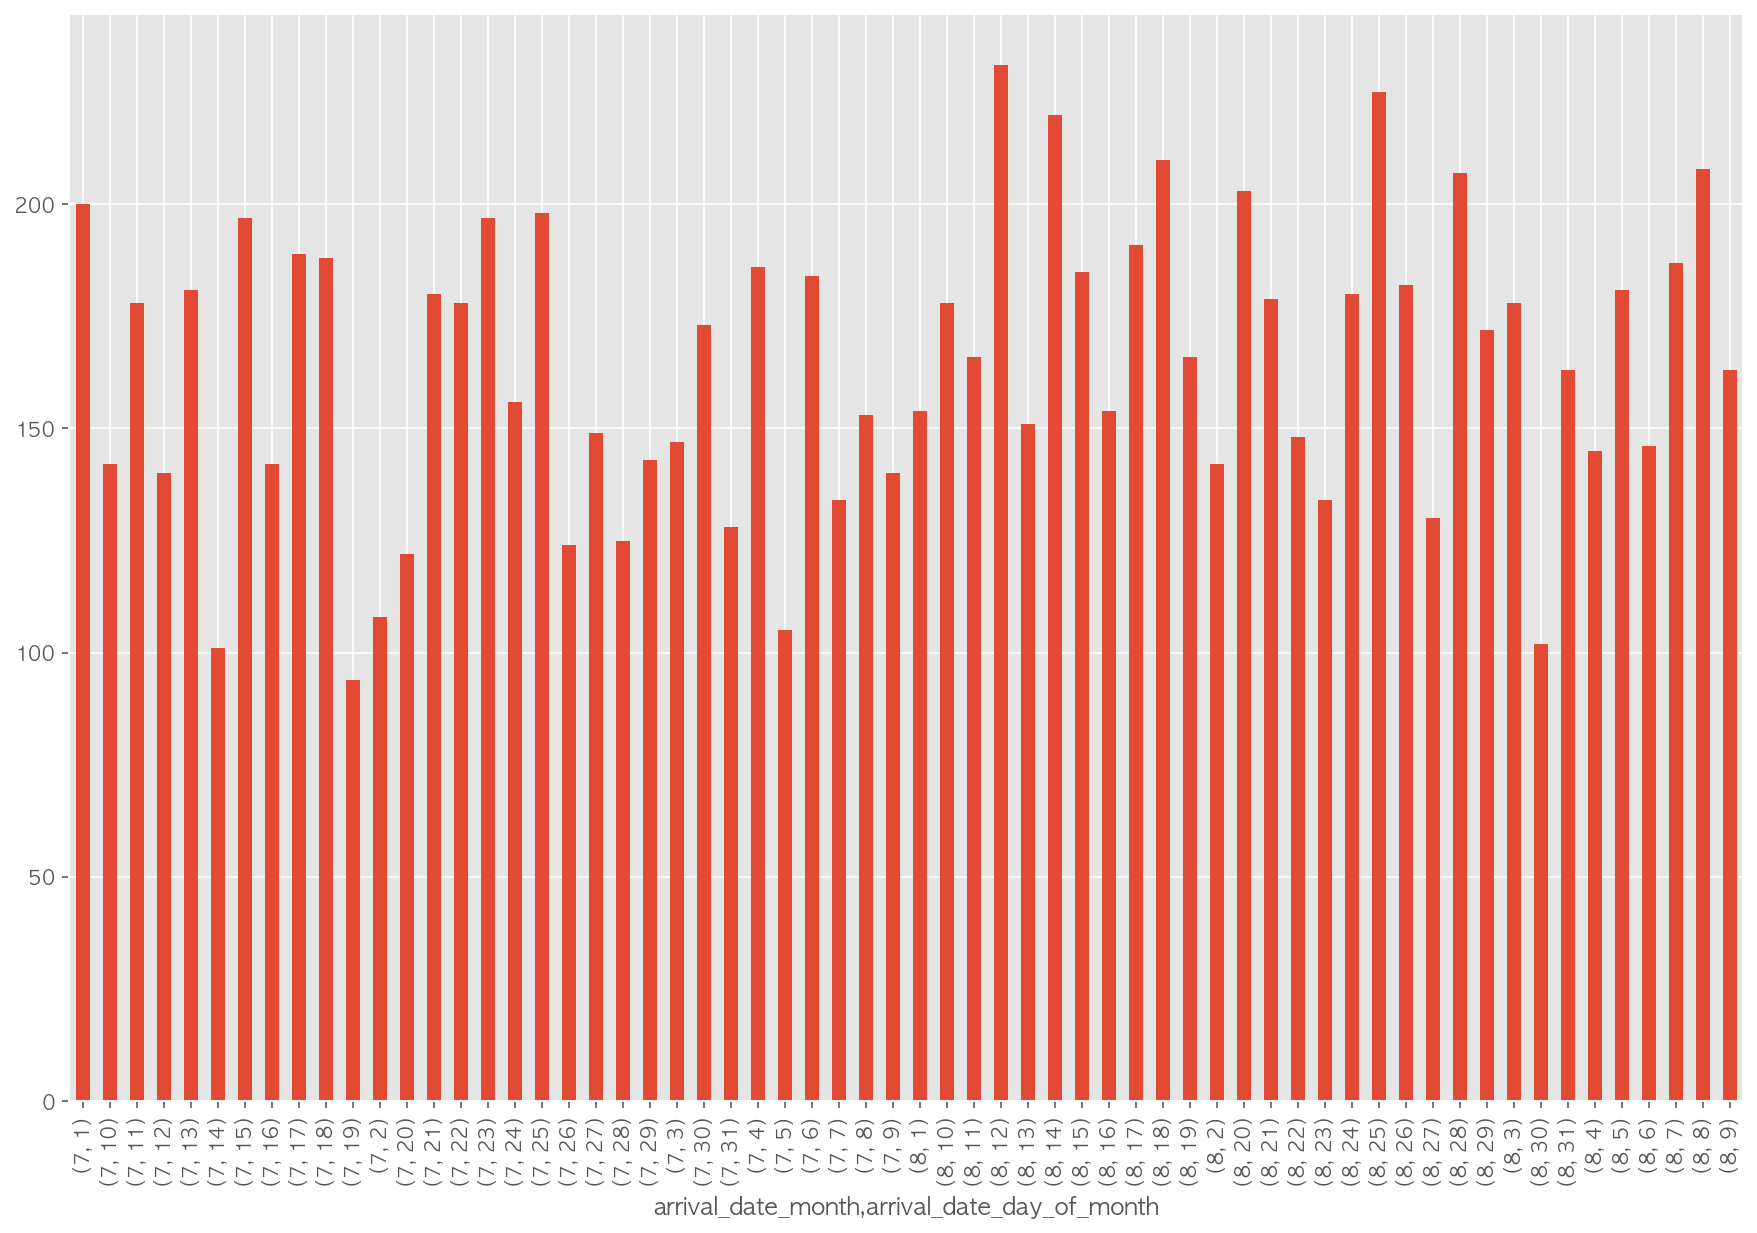

In [12]:
plt.figure(figsize=(15, 10))
peak_df.groupby(["arrival_date_month", "arrival_date_day_of_month"])["hotel"].count().plot.bar()

<AxesSubplot:xlabel='arrival_date_day_of_month'>

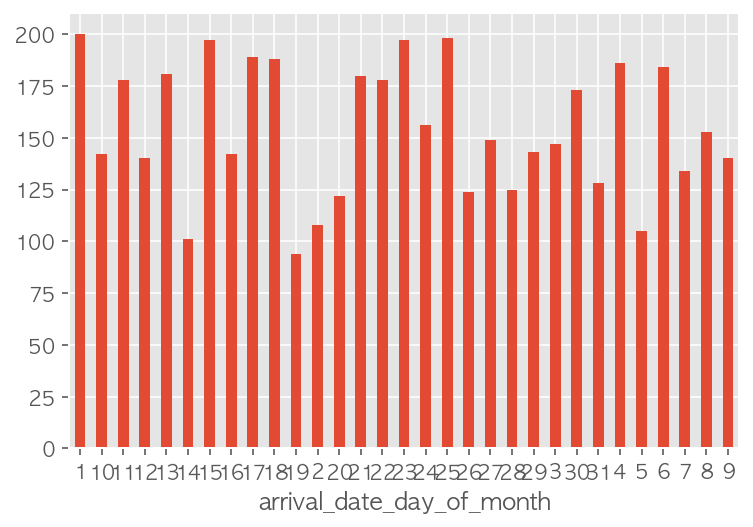

In [23]:
# 월별 며칠에 고객수가 많이 오는가
peak_df.groupby(["arrival_date_month", "arrival_date_day_of_month"])["hotel"].count().loc["7"].plot.bar(rot=0.5)

<AxesSubplot:xlabel='arrival_date_day_of_month'>

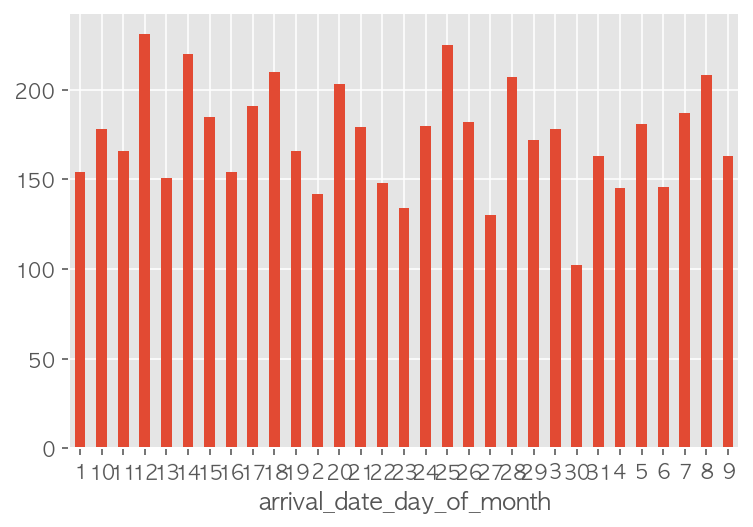

In [25]:
peak_df.groupby(["arrival_date_month", "arrival_date_day_of_month"])["hotel"].count().loc["8"].plot.bar(rot=0.5)

# EDA

## 성수기(7월, 8월) 때, 요일별 방문자 수

월    946
화    731
수    845
목    715
금    739
토    764
일    641
Name: hotel, dtype: int64

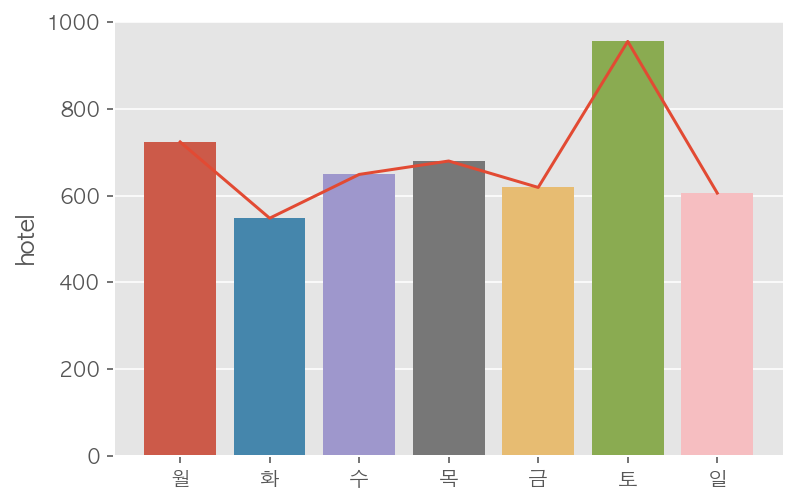

In [27]:
dayofweek_char = ["월", "화", "수", "목", "금", "토", "일"]

july_customers   = peak_df.groupby(["arrival_date_month", "dayofweek"])["hotel"].count().loc['7']
august_customers = peak_df.groupby(["arrival_date_month", "dayofweek"])["hotel"].count().loc['8']

july_customers.index   = dayofweek_char
august_customers.index = dayofweek_char

sns.barplot(x=july_customers.index, y=july_customers)
sns.lineplot(x=july_customers.index, y=july_customers)

august_customers

<AxesSubplot:ylabel='hotel'>

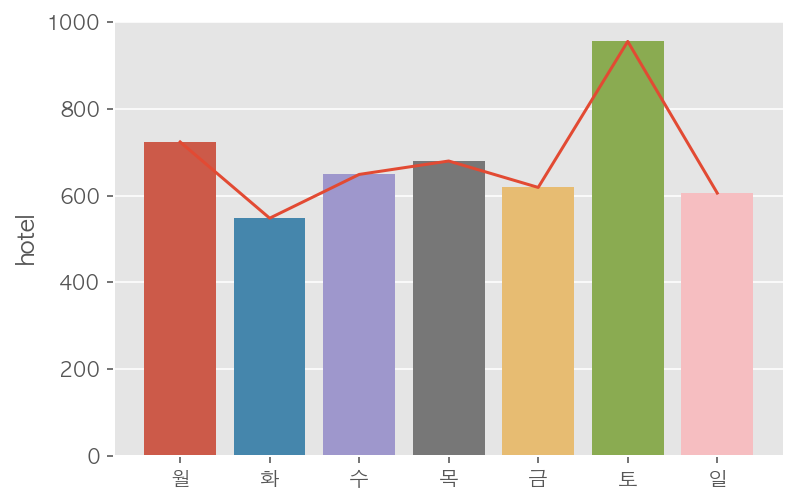

In [28]:
sns.barplot(x=july_customers.index, y=july_customers)
sns.lineplot(x=july_customers.index, y=july_customers)

dayofweek
0    1670
1    1279
2    1494
3    1395
4    1358
5    1720
6    1247
Name: hotel, dtype: int64


<AxesSubplot:xlabel='dayofweek'>

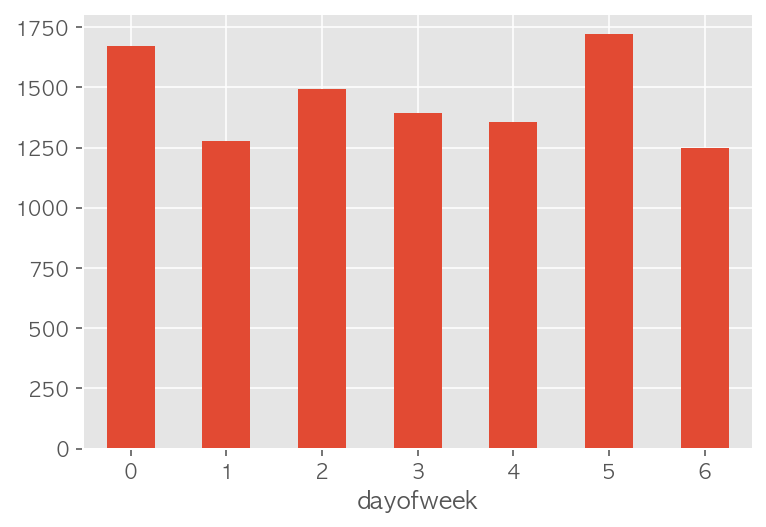

In [29]:
print(peak_df.groupby("dayofweek")["hotel"].count())
peak_df.groupby("dayofweek")["hotel"].count().plot.bar(rot=0)

In [22]:
# df_peak[(df_peak["stays_in_week_nights"] >= 1) & (df_peak["stays_in_weekend_nights"] >= 1)]
# 각 요일별 연박 비율

# 연박
# len(df_peak) df_peak["stays_in_week_nights"]

<AxesSubplot:>

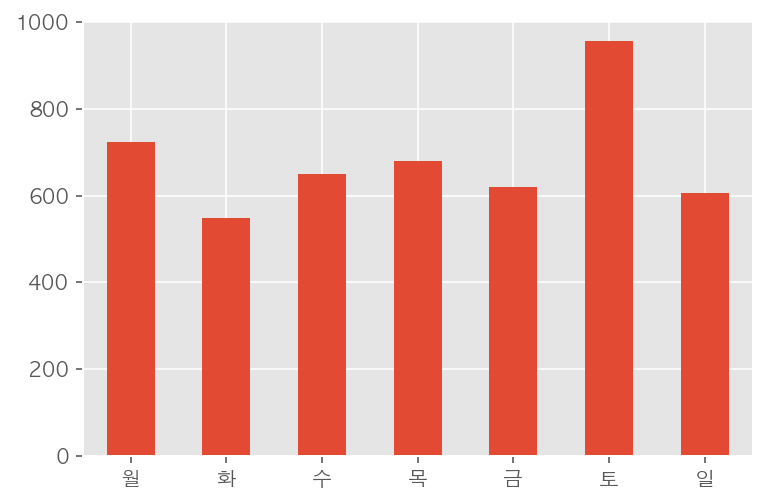

In [32]:
july_customers.plot.bar(rot=0)

<AxesSubplot:>

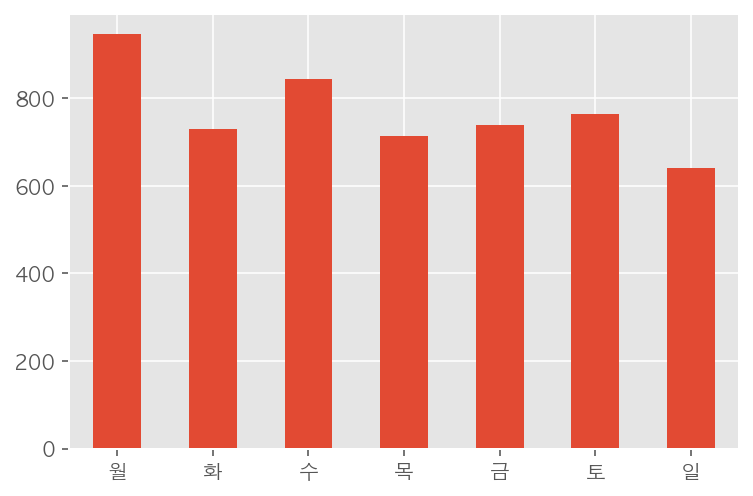

In [33]:
august_customers.plot.bar(rot=0)